## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

In [47]:
housing_data = pd.read_csv('housing.csv')

In [48]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [49]:
# Para remover linhas com valores nulos
housing_data = housing_data.dropna()

In [50]:
housing_data = pd.get_dummies(housing_data)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [51]:
# Separar features e target
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as formas dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (16346, 13)
Tamanho do conjunto de teste: (4087, 13)


In [52]:
#Treinar a árvore com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [53]:
y_pred_2 = tree_max_depth_2.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred_2)

print(f"Mean Squared Error (Profundidade Máxima = 2): {mse_2}")

Mean Squared Error (Profundidade Máxima = 2): 6916498324.432908


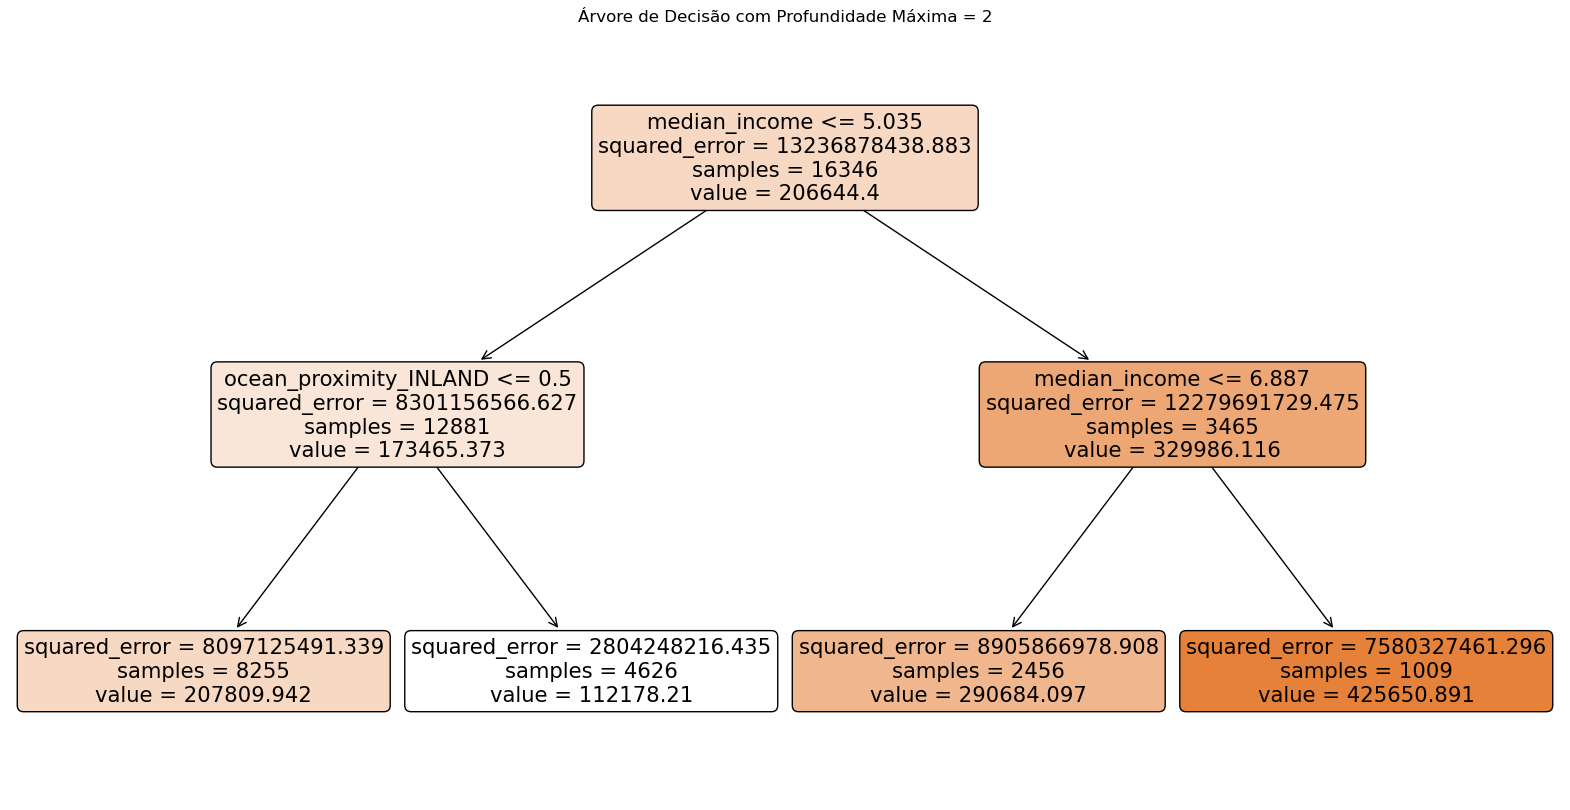

In [54]:
# Plotar a árvore com profundidade máxima = 2
plt.figure(figsize=(20, 10))
plot_tree(tree_max_depth_2, filled=True, feature_names=X.columns, rounded=True)
plt.title('Árvore de Decisão com Profundidade Máxima = 2')
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

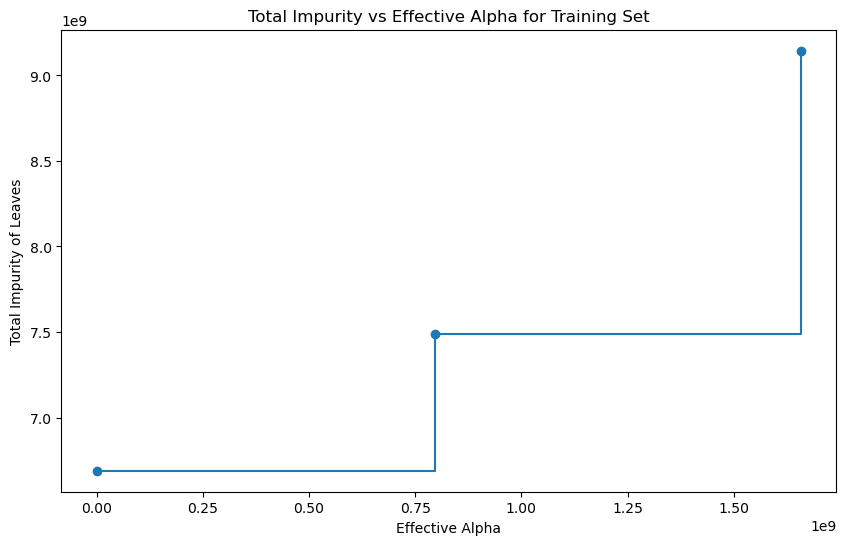

In [55]:
# Calcular o caminho CCP-alphas
path = tree_max_depth_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizar os valores de alpha e as impurezas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

In [56]:
# Exibir os valores de alpha e as respectivas impurezas
for alpha, impurity in zip(ccp_alphas, impurities):
    print(f"Alpha: {alpha:.5f}, Impurity: {impurity:.5f}")

Alpha: 0.00000, Impurity: 6688828024.52476
Alpha: 797000619.96731, Impurity: 7485828644.49207
Alpha: 1658691701.60802, Impurity: 9144520346.10008
Alpha: 4092358092.78266, Impurity: 13236878438.88274


### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [57]:
# Lista para armazenar as árvores treinadas
trees = []

# Treinar uma árvore para cada valor de alpha e armazenar na lista
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Verificar a quantidade de árvores treinadas
print(f"Número de árvores treinadas: {len(trees)}")

# Exibir o primeiro alpha e o respectivo número de nós da primeira árvore como exemplo
print(f"Primeiro valor de alpha: {ccp_alphas[0]}")
print(f"Número de nós na primeira árvore: {trees[0].tree_.node_count}")

Número de árvores treinadas: 4
Primeiro valor de alpha: 0.0
Número de nós na primeira árvore: 31349


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [58]:
# Lista para armazenar os MSEs
mse_values = []

# Calcular o MSE para cada árvore na lista
for tree in trees:
    y_pred = tree.predict(X_test)  # Fazer previsões com o conjunto de teste
    mse = mean_squared_error(y_test, y_pred)  # Calcular o MSE
    mse_values.append(mse)  # Armazenar o MSE na lista

# Exibir os MSEs calculados
for i, mse in enumerate(mse_values):
    print(f"Árvore {i+1}: MSE = {mse:.4f}")

Árvore 1: MSE = 4499677705.5965
Árvore 2: MSE = 7596849358.2282
Árvore 3: MSE = 9365226952.5446
Árvore 4: MSE = 9365226952.5446


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

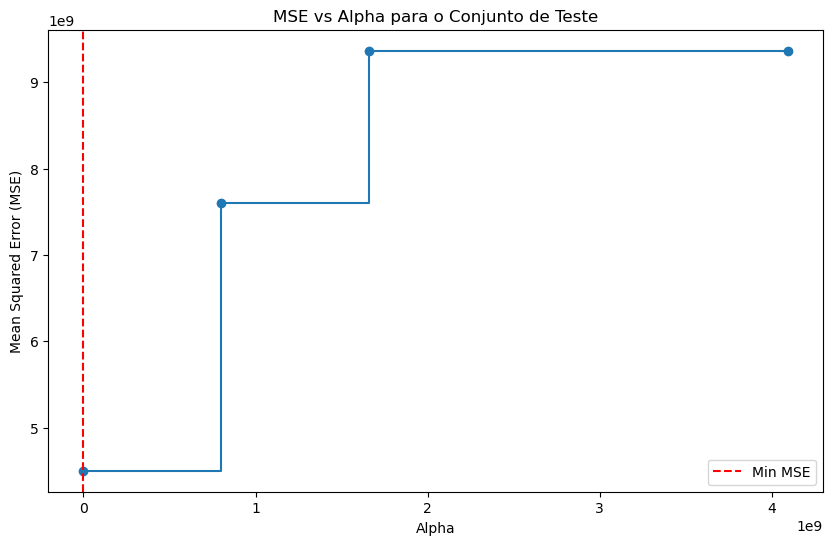

In [59]:
# Plotar o MSE vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_values, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Alpha para o Conjunto de Teste")
plt.axvline(x=ccp_alphas[mse_values.index(min(mse_values))], color='r', linestyle='--', label='Min MSE')
plt.legend()
plt.show()


In [60]:
# Identificar o alpha que minimiza o MSE
best_alpha = ccp_alphas[mse_values.index(min(mse_values))]
print(f"Melhor valor de alpha: {best_alpha:.5f}")

Melhor valor de alpha: 0.00000


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [61]:
# Cálculo do R-quadrado
r_squared = r2_score(y_test, y_pred)
print("R-quadrado:", r_squared)

R-quadrado: 0.3151661320558973


### 7. Visualize esta árvore.

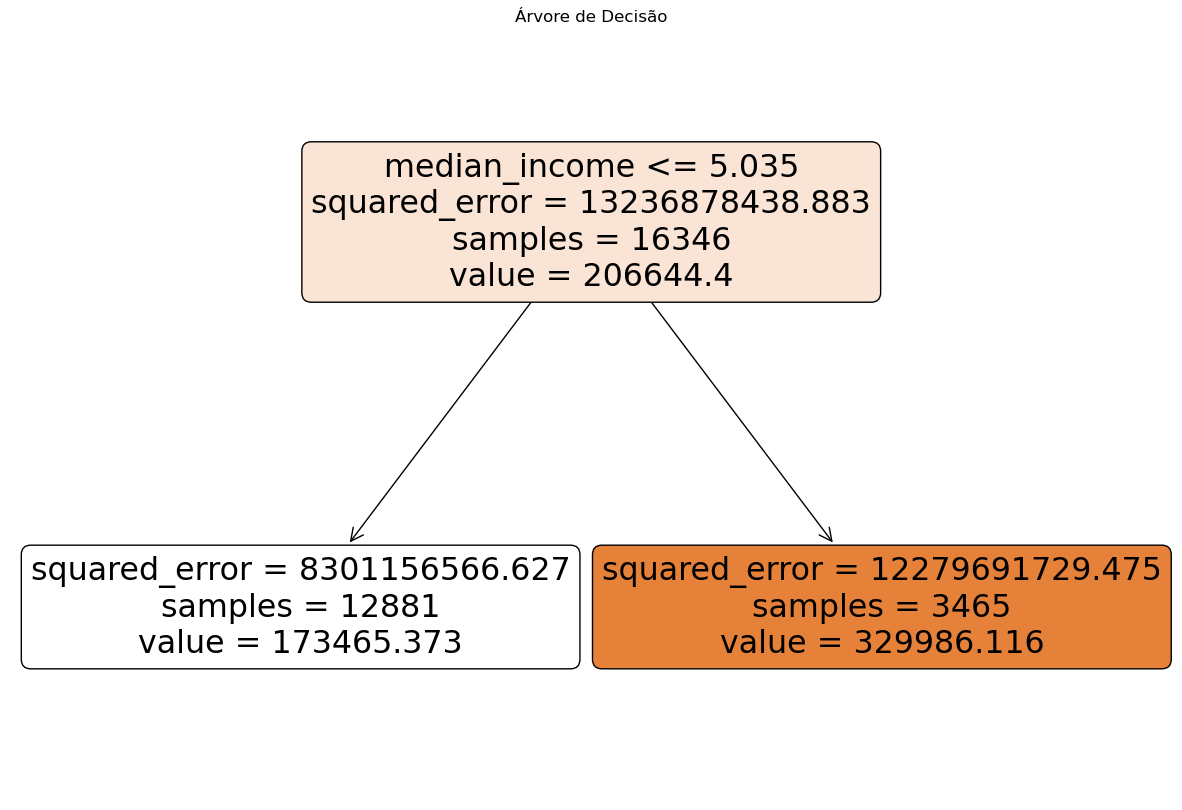

In [68]:
# Visualizando a árvore de decisão
plt.figure(figsize=(15, 10))  # Ajuste o tamanho da figura conforme necessário
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árvore de Decisão")
plt.show()